# Q 1

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
df=pd.read_csv('cubic_zirconia.csv') 

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

,mean,std,min,25%,median,75%,max,range,IQR,CV,mode
carat,0.80,0.48,0.2,0.40,0.70,1.05,4.50,4.30,0.65,0.60,0.3
depth,61.75,1.41,50.8,61.00,61.80,62.50,73.60,22.80,1.50,0.02,62.0
table,57.46,2.23,49.0,56.00,57.00,59.00,79.00,30.00,3.00,0.04,56.0
x,5.73,1.13,0.0,4.71,5.69,6.55,10.23,10.23,1.84,0.20,4.38
y,5.73,1.17,0.0,4.71,5.71,6.54,58.90,58.90,1.83,0.20,4.35
z,3.54,0.72,0.0,2.90,3.52,4.04,31.80,31.80,1.14,0.20,2.69
price,3939.52,4024.86,326.0,945.00,2375.00,5360.00,18818.00,18492.00,4415.00,1.02,544


In [8]:
df.isnull().sum().sum()

697

In [9]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [11]:
df.describe(include='object').T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column],color='y');
    plt.show()

Description of carat
--------------------------------
count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 

Distribution of carat
-------------------------------------


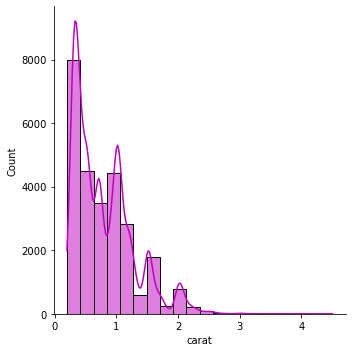

BoxPlot of carat
------------------------------


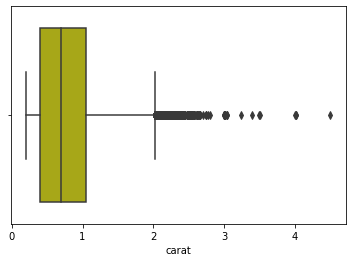

Description of depth
--------------------------------
count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 

Distribution of depth
-------------------------------------


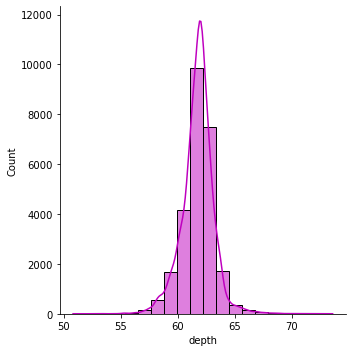

BoxPlot of depth
------------------------------


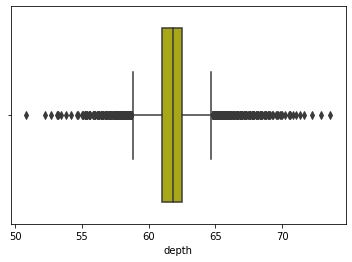

Description of table
--------------------------------
count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 

Distribution of table
-------------------------------------


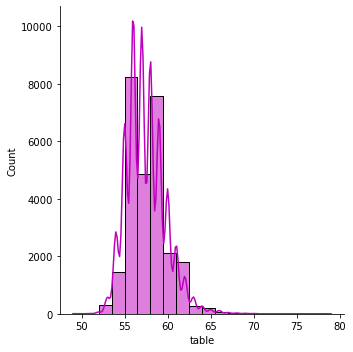

BoxPlot of table
------------------------------


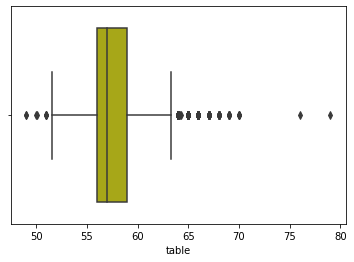

Description of x
--------------------------------
count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 

Distribution of x
-------------------------------------


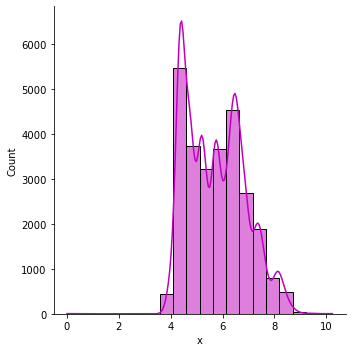

BoxPlot of x
------------------------------


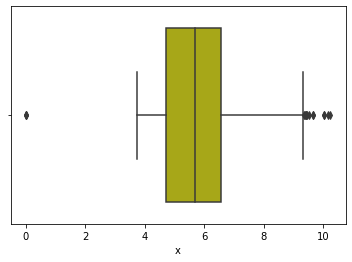

Description of y
--------------------------------
count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64 

Distribution of y
-------------------------------------


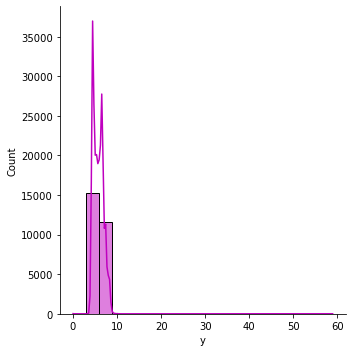

BoxPlot of y
------------------------------


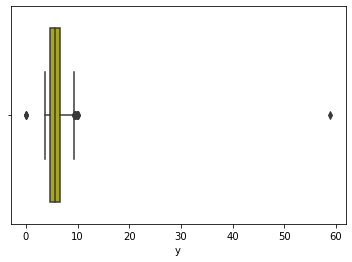

Description of z
--------------------------------
count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 

Distribution of z
-------------------------------------


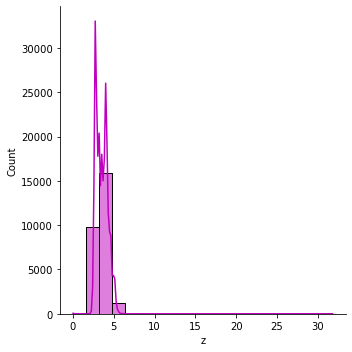

BoxPlot of z
------------------------------


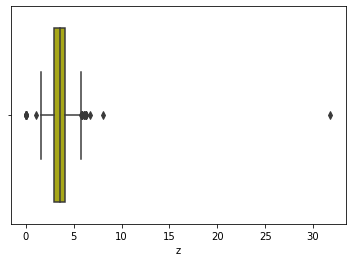

Description of price
--------------------------------
count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64 

Distribution of price
-------------------------------------


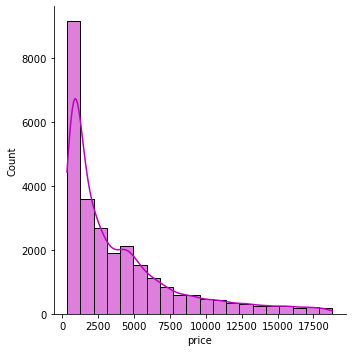

BoxPlot of price
------------------------------


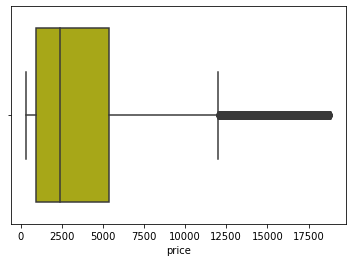

In [13]:
lstcolumns = list(df.select_dtypes(include=['int64','float64']).columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

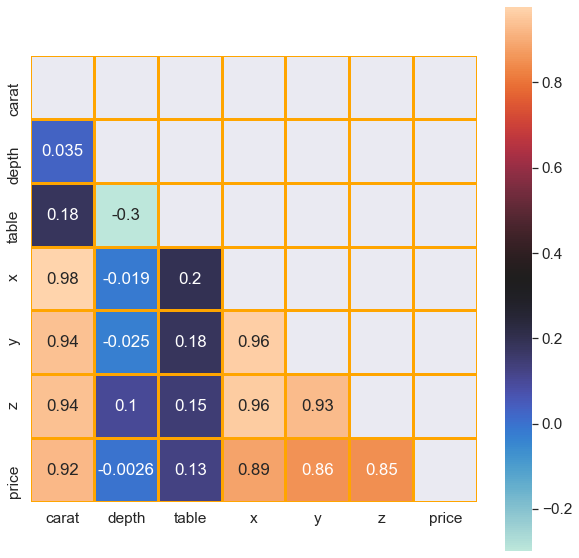

In [14]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

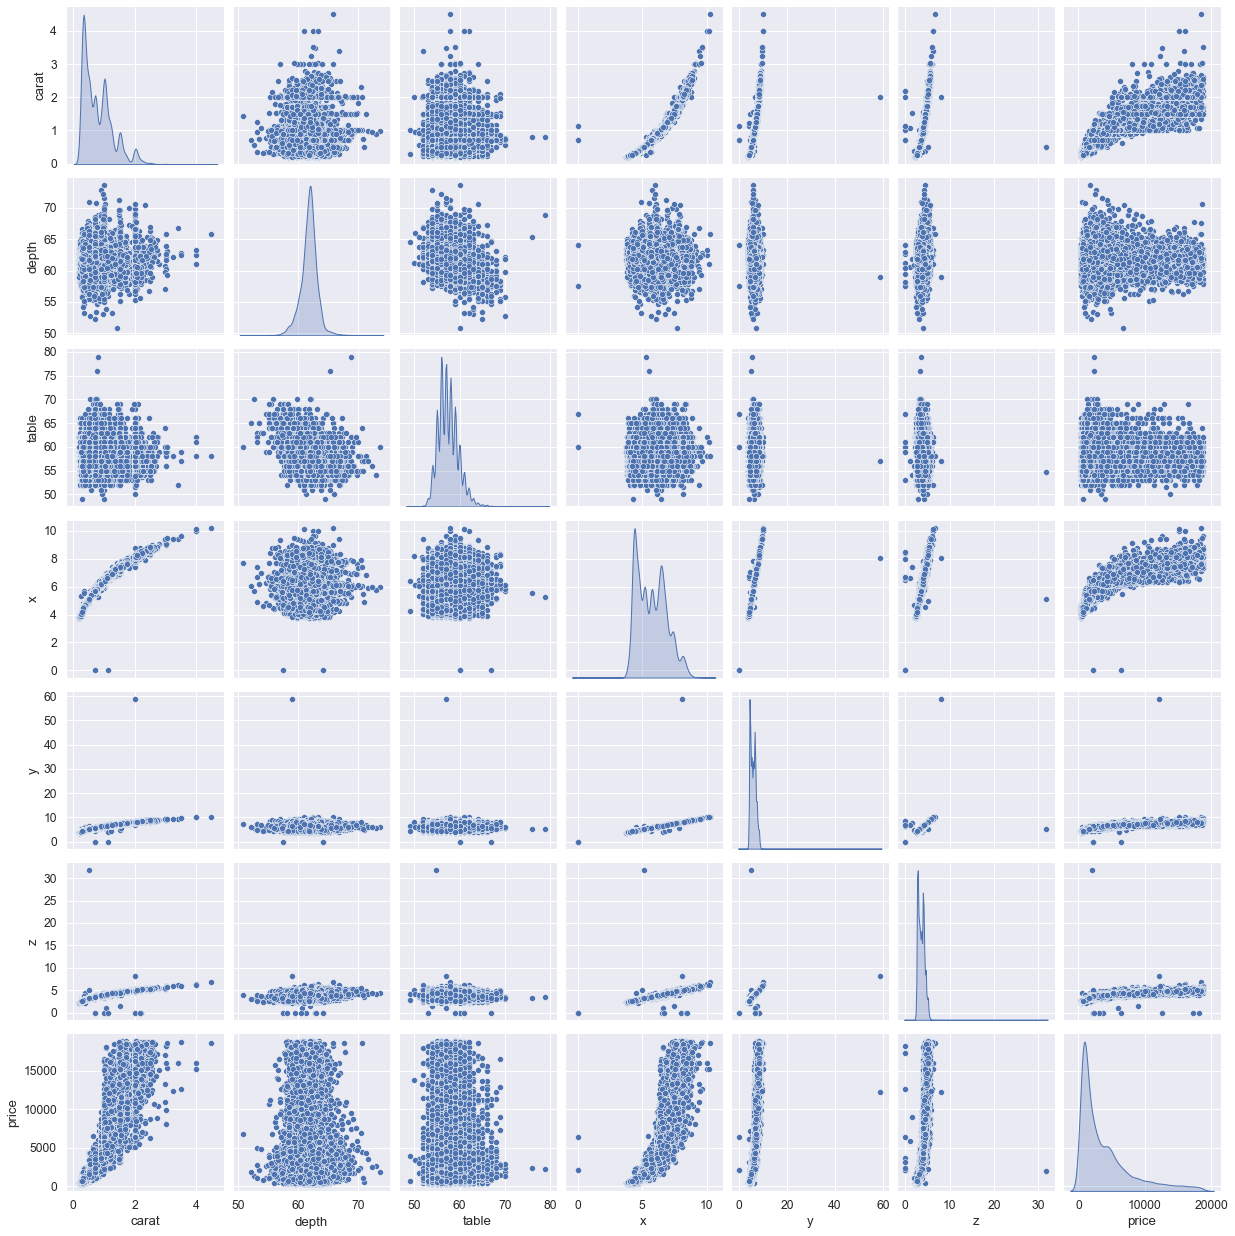

In [15]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde').savefig('out.jpg')
sns.set(font_scale=1)

In [16]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

CUT :  5 unique values
--------------------
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

 CUT (normalized)
--------------------
Ideal        0.401083
Premium      0.255831
Very Good    0.223607
Good         0.090518
Fair         0.028961
Name: cut, dtype: float64

*************************************************


COLOR :  7 unique values
--------------------
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

 COLOR (normalized)
--------------------
G    0.209923
E    0.182334
F    0.175362
H    0.152112
D    0.124003
I    0.102755
J    0.053510
Name: color, dtype: float64

*************************************************


CLARITY :  8 unique values
--------------------
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

 CLARITY (normalized)
--------------------
SI1     0.243668
VS2 

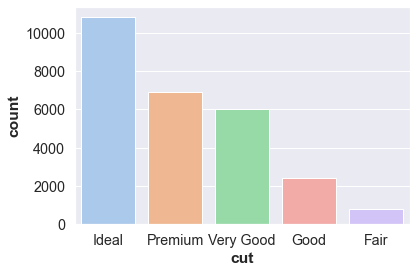

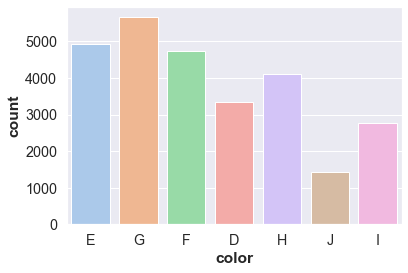

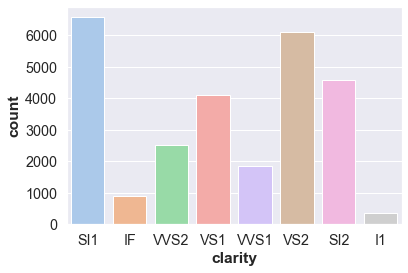

In [17]:
sns.set(font_scale=1.3)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

In [18]:
df.shape

(26967, 10)

In [19]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

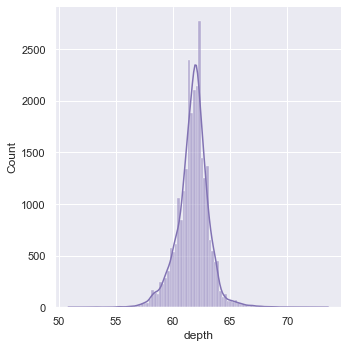

In [20]:
sns.displot(df['depth'], kde=1, color='m',bins=100);

In [21]:
df.replace(np.nan,df['depth'].mean(),inplace=True)

In [22]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [23]:
# checking for zeroes in the columns
for feature in df.columns:
    print('\n',feature,': ', 0 in df[feature].values)
    if 0 in df[feature].values:
        print('Zeroes at indices: ', df[df[feature]==0].index)


 carat :  False

 cut :  False

 color :  False

 clarity :  False

 depth :  False

 table :  False

 x :  True
Zeroes at indices:  Int64Index([5821, 6215, 17506], dtype='int64')

 y :  True
Zeroes at indices:  Int64Index([5821, 6215, 17506], dtype='int64')

 z :  True
Zeroes at indices:  Int64Index([5821, 6034, 6215, 10827, 12498, 12689, 17506, 18194, 23758], dtype='int64')

 price :  False


In [24]:
df[df['x']==0].index

Int64Index([5821, 6215, 17506], dtype='int64')

In [25]:
df[df['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [26]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [27]:
df.drop(index=[5821, 6034, 6215, 10827, 12498, 12689, 17506, 18194, 23758],inplace=True)

In [28]:
df.reset_index(drop=True)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26953,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26954,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26955,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26956,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [29]:
df.cut=df.cut.str.replace('Fair', 'Good')

df.clarity=df.clarity.str.replace('I1', 'SI2')
df.clarity=df.clarity.str.replace('IF', 'VVS1')
df.clarity=df.clarity.str.replace('SSI2', 'SI1')  # due to first line, 'SI1' falsely gets converted into 'SSI1'

df.color=df.color.str.replace('J', 'I')

In [30]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

CUT :  4 unique values
--------------------
Ideal        10816
Premium       6893
Very Good     6030
Good          3219
Name: cut, dtype: int64

 CUT (normalized)
--------------------
Ideal        0.401217
Premium      0.255694
Very Good    0.223681
Good         0.119408
Name: cut, dtype: float64

*************************************************


COLOR :  6 unique values
--------------------
G    5658
E    4917
F    4727
I    4214
H    4098
D    3344
Name: color, dtype: int64

 COLOR (normalized)
--------------------
G    0.209882
E    0.182395
F    0.175347
I    0.156317
H    0.152014
D    0.124045
Name: color, dtype: float64

*************************************************


CLARITY :  6 unique values
--------------------
SI1     6570
VS2     6098
SI2     4934
VS1     4092
VVS1    2733
VVS2    2531
Name: clarity, dtype: int64

 CLARITY (normalized)
--------------------
SI1     0.243712
VS2     0.226204
SI2     0.183025
VS1     0.151792
VVS1    0.101380
VVS2    0.093887
Name: clar

In [31]:
df.cut=df.cut.str.replace('Good', '0')
df.cut=df.cut.str.replace('Very 0', '1')  # 'Very 0' for 'Very Good' as 'Good' already replaced with 0 in previous step
df.cut=df.cut.str.replace('Premium', '2')
df.cut=df.cut.str.replace('Ideal', '3')

In [32]:
df.color=df.color.str.replace('D', '0')
df.color=df.color.str.replace('E', '1')
df.color=df.color.str.replace('F', '2')
df.color=df.color.str.replace('G', '3')
df.color=df.color.str.replace('H', '4')
df.color=df.color.str.replace('I', '5')

In [33]:
df.clarity=df.clarity.str.replace('VVS1', '0')
df.clarity=df.clarity.str.replace('VVS2', '1')
df.clarity=df.clarity.str.replace('VS1', '2')
df.clarity=df.clarity.str.replace('VS2', '4')
df.clarity=df.clarity.str.replace('SI1', '4')
df.clarity=df.clarity.str.replace('SI2', '5')

In [34]:
df['cut'] = df['cut'].astype('int8')
df['color'] = df['color'].astype('int8')
df['clarity'] = df['clarity'].astype('int8')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  int8   
 2   color    26958 non-null  int8   
 3   clarity  26958 non-null  int8   
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(6), int64(1), int8(3)
memory usage: 1.7 MB


### Train-Test Split

In [36]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [37]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,3,1,4,62.1,58.0,4.27,4.29,2.66
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96
4,0.31,3,2,0,60.4,59.0,4.35,4.43,2.65


In [38]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [39]:
# invoke the LinearRegression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [40]:
 regression_model.coef_

array([[ 1.09813573e+04,  1.14131942e+02, -3.14083224e+02,
        -4.37854245e+02, -1.11127683e+02, -4.07073966e+01,
        -9.96551384e+02,  1.09105215e+01, -5.41747498e+01]])

In [41]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("{} : {}".format(col_name, round(regression_model.coef_[0][idx],2)))

carat : 10981.36
cut : 114.13
color : -314.08
clarity : -437.85
depth : -111.13
table : -40.71
x : -996.55
y : 10.91
z : -54.17


In [42]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(round(intercept,2)))

The intercept for our model is 12192.55


In [43]:
# R square on training data
round(regression_model.score(X_train, y_train),4)

0.9012

90.12% of the variation in the price is explained by the predictors in the model for train set

In [44]:
# R square on testing data
round(regression_model.score(X_test, y_test),4)

0.894

In [45]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
round(np.sqrt(metrics.mean_squared_error(y_train,predicted_train)),2)

1252.91

In [46]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
round(np.sqrt(metrics.mean_squared_error(y_test,predicted_test)),2)

1337.45

### Linear Regression using statsmodels

In [47]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
7598,0.71,1,3,2,63.3,59.0,5.52,5.61,3.52,2768
8882,0.30,1,1,4,62.9,58.0,4.27,4.31,2.70,544
22763,0.70,0,4,4,63.9,59.0,5.64,5.60,3.59,2351
6643,0.36,3,1,4,60.2,56.0,4.65,4.62,2.79,1080
18701,1.66,1,5,4,63.0,57.0,7.45,7.50,4.71,8901


In [48]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [49]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [50]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
round(lm1.params,2)

Intercept    12192.55
carat        10981.36
cut            114.13
color         -314.08
clarity       -437.85
depth         -111.13
table          -40.71
x             -996.55
y               10.91
z              -54.17
dtype: float64

In [51]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.911e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:23:25   Log-Likelihood:            -1.6138e+05
No. Observations:               18870   AIC:                         3.228e+05
Df Residuals:                   18860   BIC:                         3.229e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.219e+04    722.393     16.878      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [52]:
df_predict = data_train.drop('price',axis=1)
y_hat = lm1.predict(df_predict) # lm1.predict()

In [53]:
error = y_hat - data_train['price']

In [54]:
squares = error **2

In [55]:
mse = np.mean(squares)
mse

1569795.8107189254

In [56]:
rmse = np.sqrt(mse)
rmse

1252.914925571136

In [57]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [58]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1252.914925571136

In [59]:
np.sqrt(lm1.mse_resid) #another way

1253.2470435161538

In [60]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

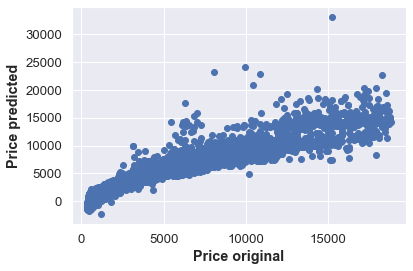

In [61]:
sns.set(font_scale=1.2)
plt.scatter(y_test['price'], y_pred)
plt.xlabel('Price original', weight='bold')
plt.ylabel('Price predicted', weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [62]:
lm1.params

Intercept    12192.554446
carat        10981.357320
cut            114.131942
color         -314.083224
clarity       -437.854245
depth         -111.127683
table          -40.707397
x             -996.551384
y               10.910521
z              -54.174750
dtype: float64

In [63]:
lm1.params.reset_index()

,index,0
0,Intercept,12192.554446
1,carat,10981.357320
2,cut,114.131942
3,color,-314.083224
4,clarity,-437.854245
5,depth,-111.127683
6,table,-40.707397
7,x,-996.551384
8,y,10.910521
9,z,-54.174750


In [64]:
np.array(lm1.params.reset_index())

array([['Intercept', 12192.554445635058],
       ['carat', 10981.357320390343],
       ['cut', 114.13194231183738],
       ['color', -314.0832243074929],
       ['clarity', -437.8542454110549],
       ['depth', -111.12768318379958],
       ['table', -40.70739658841054],
       ['x', -996.5513840551705],
       ['y', 10.910521491231293],
       ['z', -54.17474980962497]], dtype=object)

In [65]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(12192.55) * Intercept + (10981.36) * carat + (114.13) * cut + (-314.08) * color + (-437.85) * clarity + (-111.13) * depth + (-40.71) * table + (-996.55) * x + (10.91) * y + (-54.17) * z + 

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [68]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1
# typical values of vif should be within 1 and 5, but below all values seen to be quite high, indicating strong multicollnearity

carat ---> 81.26702484050182
cut ---> 5.031044359326054
color ---> 3.9111801061051072
clarity ---> 5.839894004643886
depth ---> 550.2442872741175
table ---> 553.1600797263366
x ---> 1132.5080472182394
y ---> 348.2184505510831
z ---> 385.92953586173917


# model 2

In [69]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [70]:
df=pd.read_csv('cubic_zirconia.csv') 

In [71]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [72]:
df.replace(np.nan,df['depth'].mean(),inplace=True)

In [73]:
df.drop(index=[5821, 6034, 6215, 10827, 12498, 12689, 17506, 18194, 23758],inplace=True)

In [74]:
df.cut=df.cut.str.replace('Fair', 'Good')

df.clarity=df.clarity.str.replace('I1', 'SI2')
df.clarity=df.clarity.str.replace('IF', 'VVS1')
df.clarity=df.clarity.str.replace('SSI2', 'SI1')  # due to first line, 'SI1' falsely gets converted into 'SSI1'

df.color=df.color.str.replace('J', 'I')

In [75]:
df.cut=df.cut.str.replace('Good', '0')
df.cut=df.cut.str.replace('Very 0', '1')  # 'Very 0' for 'Very Good' as 'Good' already replaced with 0 in previous step
df.cut=df.cut.str.replace('Premium', '2')
df.cut=df.cut.str.replace('Ideal', '3')

df.color=df.color.str.replace('D', '0')
df.color=df.color.str.replace('E', '1')
df.color=df.color.str.replace('F', '2')
df.color=df.color.str.replace('G', '3')
df.color=df.color.str.replace('H', '4')
df.color=df.color.str.replace('I', '5')

df.clarity=df.clarity.str.replace('VVS1', '0')
df.clarity=df.clarity.str.replace('VVS2', '1')
df.clarity=df.clarity.str.replace('VS1', '2')
df.clarity=df.clarity.str.replace('VS2', '4')
df.clarity=df.clarity.str.replace('SI1', '4')
df.clarity=df.clarity.str.replace('SI2', '5')

df['cut'] = df['cut'].astype('int8')
df['color'] = df['color'].astype('int8')
df['clarity'] = df['clarity'].astype('int8')

In [76]:
X = df.drop(['price','x','y','z'], axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [77]:
X.head()

,carat,cut,color,clarity,depth,table
0,0.30,3,1,4,62.1,58.0
1,0.33,2,3,0,60.8,58.0
2,0.90,1,1,1,62.2,60.0
3,0.42,3,2,2,61.6,56.0
4,0.31,3,2,0,60.4,59.0


In [78]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [79]:
# invoke the LinearRegression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [80]:
 regression_model.coef_

array([[8643.74194518,  119.25122959, -309.4503742 , -461.35715994,
         -68.70306923,  -39.3134571 ]])

In [81]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("{} : {}".format(col_name, round(regression_model.coef_[0][idx],2)))

carat : 8643.74
cut : 119.25
color : -309.45
clarity : -461.36
depth : -68.7
table : -39.31


In [82]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(round(intercept,2)))

The intercept for our model is 5571.31


In [83]:
# R square on training data
round(regression_model.score(X_train, y_train),4)

0.8979

In [84]:
# R square on testing data
round(regression_model.score(X_test, y_test),4)

0.891

In [85]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
round(np.sqrt(metrics.mean_squared_error(y_train,predicted_train)),2)

1273.69

In [86]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
round(np.sqrt(metrics.mean_squared_error(y_test,predicted_test)),2)

1356.44

### Linear Regression using statsmodels

In [87]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,price
7598,0.71,1,3,2,63.3,59.0,2768
8882,0.30,1,1,4,62.9,58.0,544
22763,0.70,0,4,4,63.9,59.0,2351
6643,0.36,3,1,4,60.2,56.0,1080
18701,1.66,1,5,4,63.0,57.0,8901


In [88]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')

In [89]:
expr= 'price ~ carat + cut + color + clarity + depth + table'

In [90]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
round(lm1.params,2)

Intercept    5571.31
carat        8643.74
cut           119.25
color        -309.45
clarity      -461.36
depth         -68.70
table         -39.31
dtype: float64

In [91]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 2.765e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:23:36   Log-Likelihood:            -1.6169e+05
No. Observations:               18870   AIC:                         3.234e+05
Df Residuals:                   18863   BIC:                         3.234e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5571.3066    664.851      8.380      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [92]:
df_predict = data_train.drop('price',axis=1)
y_hat = lm1.predict(df_predict) # lm1.predict()

In [93]:
error = y_hat - data_train['price']

In [94]:
squares = error **2

In [95]:
mse = np.mean(squares)
mse

1622290.6815941252

In [96]:
rmse = np.sqrt(mse)
rmse

1273.6917529740565

In [97]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [98]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1273.6917529740565

In [99]:
np.sqrt(lm1.mse_resid) #another way

1273.9280625553536

In [100]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

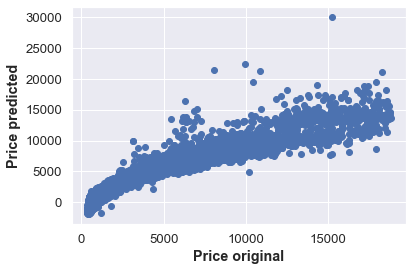

In [101]:
sns.set(font_scale=1.2)
plt.scatter(y_test['price'], y_pred)
plt.xlabel('Price original', weight='bold')
plt.ylabel('Price predicted', weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [102]:
lm1.params

Intercept    5571.306634
carat        8643.741945
cut           119.251230
color        -309.450374
clarity      -461.357160
depth         -68.703069
table         -39.313457
dtype: float64

In [103]:
lm1.params.reset_index()

,index,0
0,Intercept,5571.306634
1,carat,8643.741945
2,cut,119.251230
3,color,-309.450374
4,clarity,-461.357160
5,depth,-68.703069
6,table,-39.313457


In [104]:
np.array(lm1.params.reset_index())

array([['Intercept', 5571.306634277622],
       ['carat', 8643.741945182615],
       ['cut', 119.25122958807187],
       ['color', -309.450374202954],
       ['clarity', -461.3571599366455],
       ['depth', -68.70306922918012],
       ['table', -39.313457100755784]], dtype=object)

In [105]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(5571.31) * Intercept + (8643.74) * carat + (119.25) * cut + (-309.45) * color + (-461.36) * clarity + (-68.7) * depth + (-39.31) * table + 

In [106]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
round(lm1.params,2)

Intercept    5571.31
carat        8643.74
cut           119.25
color        -309.45
clarity      -461.36
depth         -68.70
table         -39.31
dtype: float64

In [107]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 2.765e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:23:40   Log-Likelihood:            -1.6169e+05
No. Observations:               18870   AIC:                         3.234e+05
Df Residuals:                   18863   BIC:                         3.234e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5571.3066    664.851      8.380      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [108]:
df_predict = data_train.drop('price',axis=1)
y_hat = lm1.predict(df_predict) # lm1.predict()

In [109]:
error = y_hat - data_train['price']

In [110]:
squares = error **2

In [111]:
mse = np.mean(squares)
mse

1622290.6815941252

In [112]:
rmse = np.sqrt(mse)
rmse

1273.6917529740565

In [113]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [114]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1273.6917529740565

In [115]:
np.sqrt(lm1.mse_resid) #another way

1273.9280625553536

In [116]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

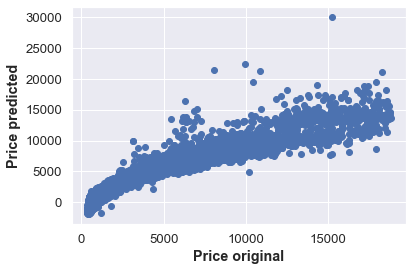

In [117]:
sns.set(font_scale=1.2)
plt.scatter(y_test['price'], y_pred)
plt.xlabel('Price original', weight='bold')
plt.ylabel('Price predicted', weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [118]:
lm1.params

Intercept    5571.306634
carat        8643.741945
cut           119.251230
color        -309.450374
clarity      -461.357160
depth         -68.703069
table         -39.313457
dtype: float64

In [119]:
lm1.params.reset_index()

,index,0
0,Intercept,5571.306634
1,carat,8643.741945
2,cut,119.251230
3,color,-309.450374
4,clarity,-461.357160
5,depth,-68.703069
6,table,-39.313457


In [120]:
np.array(lm1.params.reset_index())

array([['Intercept', 5571.306634277622],
       ['carat', 8643.741945182615],
       ['cut', 119.25122958807187],
       ['color', -309.450374202954],
       ['clarity', -461.3571599366455],
       ['depth', -68.70306922918012],
       ['table', -39.313457100755784]], dtype=object)

In [121]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(5571.31) * Intercept + (8643.74) * carat + (119.25) * cut + (-309.45) * color + (-461.36) * clarity + (-68.7) * depth + (-39.31) * table + 

In [122]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [123]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1
# typical values of vif should be within 1 and 5, but below all values seen to be quite high, indicating strong multicollnearity

carat ---> 4.813537462856105
cut ---> 4.6887878938819965
color ---> 3.9070145321190806
clarity ---> 5.7358920098839175
depth ---> 443.6116924208865
table ---> 426.035143099026


# model 3

In [124]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [125]:
df=pd.read_csv('cubic_zirconia.csv') 

In [126]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [127]:
df.replace(np.nan,df['depth'].mean(),inplace=True)

In [128]:
df.drop(index=[5821, 6034, 6215, 10827, 12498, 12689, 17506, 18194, 23758],inplace=True)

In [129]:
df.cut=df.cut.str.replace('Fair', 'Good')

df.clarity=df.clarity.str.replace('I1', 'SI2')
df.clarity=df.clarity.str.replace('IF', 'VVS1')
df.clarity=df.clarity.str.replace('SSI2', 'SI1')  # due to first line, 'SI1' falsely gets converted into 'SSI1'

df.color=df.color.str.replace('J', 'I')

In [130]:
df.cut=df.cut.str.replace('Good', '0')
df.cut=df.cut.str.replace('Very 0', '1')  # 'Very 0' for 'Very Good' as 'Good' already replaced with 0 in previous step
df.cut=df.cut.str.replace('Premium', '2')
df.cut=df.cut.str.replace('Ideal', '3')

df.color=df.color.str.replace('D', '0')
df.color=df.color.str.replace('E', '1')
df.color=df.color.str.replace('F', '2')
df.color=df.color.str.replace('G', '3')
df.color=df.color.str.replace('H', '4')
df.color=df.color.str.replace('I', '5')

df.clarity=df.clarity.str.replace('VVS1', '0')
df.clarity=df.clarity.str.replace('VVS2', '1')
df.clarity=df.clarity.str.replace('VS1', '2')
df.clarity=df.clarity.str.replace('VS2', '4')
df.clarity=df.clarity.str.replace('SI1', '4')
df.clarity=df.clarity.str.replace('SI2', '5')

df['cut'] = df['cut'].astype('int8')
df['color'] = df['color'].astype('int8')
df['clarity'] = df['clarity'].astype('int8')

In [131]:
X = df.drop(['price','x','y','z','depth'], axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [132]:
X.head()

,carat,cut,color,clarity,table
0,0.30,3,1,4,58.0
1,0.33,2,3,0,58.0
2,0.90,1,1,1,60.0
3,0.42,3,2,2,56.0
4,0.31,3,2,0,59.0


In [133]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [134]:
# invoke the LinearRegression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [135]:
 regression_model.coef_

array([[8635.09154742,  153.87746229, -312.2454843 , -464.63734063,
         -18.92588522]])

In [136]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("{} : {}".format(col_name, round(regression_model.coef_[0][idx],2)))

carat : 8635.09
cut : 153.88
color : -312.25
clarity : -464.64
table : -18.93


In [137]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(round(intercept,2)))

The intercept for our model is 115.08


In [138]:
# R square on training data
round(regression_model.score(X_train, y_train),4)

0.8975

In [139]:
# R square on testing data
round(regression_model.score(X_test, y_test),4)

0.8908

In [140]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
round(np.sqrt(metrics.mean_squared_error(y_train,predicted_train)),2)

1276.44

In [141]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
round(np.sqrt(metrics.mean_squared_error(y_test,predicted_test)),2)

1357.85

### Linear Regression using statsmodels

In [142]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,table,price
7598,0.71,1,3,2,59.0,2768
8882,0.30,1,1,4,58.0,544
22763,0.70,0,4,4,59.0,2351
6643,0.36,3,1,4,56.0,1080
18701,1.66,1,5,4,57.0,8901


In [143]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'price'], dtype='object')

In [144]:
expr= 'price ~ carat + cut + color + clarity + table'

In [145]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
round(lm1.params,2)

Intercept     115.08
carat        8635.09
cut           153.88
color        -312.25
clarity      -464.64
table         -18.93
dtype: float64

In [146]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 3.302e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:23:47   Log-Likelihood:            -1.6173e+05
No. Observations:               18870   AIC:                         3.235e+05
Df Residuals:                   18864   BIC:                         3.235e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0802    277.374      0.415      0.6

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [147]:
df_predict = data_train.drop('price',axis=1)
y_hat = lm1.predict(df_predict) # lm1.predict()

In [148]:
error = y_hat - data_train['price']

In [149]:
squares = error **2

In [150]:
mse = np.mean(squares)
mse

1629297.3783547052

In [151]:
rmse = np.sqrt(mse)
rmse

1276.4393359477392

In [152]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [153]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1276.4393359477392

In [154]:
np.sqrt(lm1.mse_resid) #another way

1276.6423158863604

In [155]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

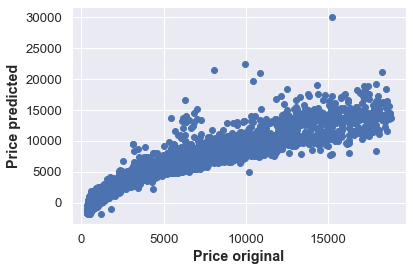

In [156]:
sns.set(font_scale=1.2)
plt.scatter(y_test['price'], y_pred)
plt.xlabel('Price original', weight='bold')
plt.ylabel('Price predicted', weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [157]:
lm1.params

Intercept     115.080248
carat        8635.091547
cut           153.877462
color        -312.245484
clarity      -464.637341
table         -18.925885
dtype: float64

In [158]:
lm1.params.reset_index()

,index,0
0,Intercept,115.080248
1,carat,8635.091547
2,cut,153.877462
3,color,-312.245484
4,clarity,-464.637341
5,table,-18.925885


In [159]:
np.array(lm1.params.reset_index())

array([['Intercept', 115.08024800984248],
       ['carat', 8635.091547419808],
       ['cut', 153.87746228824153],
       ['color', -312.24548430292026],
       ['clarity', -464.63734063272585],
       ['table', -18.92588522221898]], dtype=object)

In [160]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(115.08) * Intercept + (8635.09) * carat + (153.88) * cut + (-312.25) * color + (-464.64) * clarity + (-18.93) * table + 

In [161]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
round(lm1.params,2)

Intercept     115.08
carat        8635.09
cut           153.88
color        -312.25
clarity      -464.64
table         -18.93
dtype: float64

In [162]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 3.302e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:23:50   Log-Likelihood:            -1.6173e+05
No. Observations:               18870   AIC:                         3.235e+05
Df Residuals:                   18864   BIC:                         3.235e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0802    277.374      0.415      0.6

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [163]:
df_predict = data_train.drop('price',axis=1)
y_hat = lm1.predict(df_predict) # lm1.predict()

In [164]:
error = y_hat - data_train['price']

In [165]:
squares = error **2

In [166]:
mse = np.mean(squares)
mse

1629297.3783547052

In [167]:
rmse = np.sqrt(mse)
rmse

1276.4393359477392

In [168]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [169]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1276.4393359477392

In [170]:
np.sqrt(lm1.mse_resid) #another way

1276.6423158863604

In [171]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

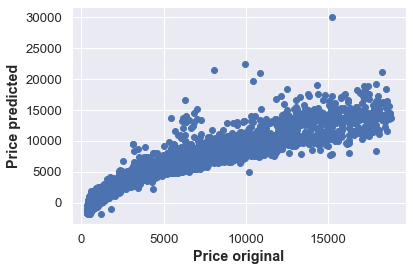

In [172]:
sns.set(font_scale=1.2)
plt.scatter(y_test['price'], y_pred)
plt.xlabel('Price original', weight='bold')
plt.ylabel('Price predicted', weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [173]:
lm1.params

Intercept     115.080248
carat        8635.091547
cut           153.877462
color        -312.245484
clarity      -464.637341
table         -18.925885
dtype: float64

In [174]:
lm1.params.reset_index()

,index,0
0,Intercept,115.080248
1,carat,8635.091547
2,cut,153.877462
3,color,-312.245484
4,clarity,-464.637341
5,table,-18.925885


In [175]:
np.array(lm1.params.reset_index())

array([['Intercept', 115.08024800984248],
       ['carat', 8635.091547419808],
       ['cut', 153.87746228824153],
       ['color', -312.24548430292026],
       ['clarity', -464.63734063272585],
       ['table', -18.92588522221898]], dtype=object)

In [176]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(115.08) * Intercept + (8635.09) * carat + (153.88) * cut + (-312.25) * color + (-464.64) * clarity + (-18.93) * table + 

In [177]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [178]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1
# typical values of vif should be within 1 and 5, but below all values seen to be quite high, indicating strong multicollnearity

carat ---> 4.792950467196248
cut ---> 4.22982809963391
color ---> 3.8823152925775894
clarity ---> 5.723176992505825
table ---> 12.505858535111608


# model 4 and 5

In [179]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [180]:
df=pd.read_csv('cubic_zirconia.csv') 

In [181]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [182]:
df.drop(index=[5821, 6034, 6215, 10827, 12498, 12689, 17506, 18194, 23758],inplace=True)

In [183]:
df.cut=df.cut.str.replace('Fair', 'Good')

df.clarity=df.clarity.str.replace('I1', 'SI2')
df.clarity=df.clarity.str.replace('IF', 'VVS1')
df.clarity=df.clarity.str.replace('SSI2', 'SI1')  # due to first line, 'SI1' falsely gets converted into 'SSI1'

df.color=df.color.str.replace('J', 'I')

In [184]:
df.cut=df.cut.str.replace('Good', '0')
df.cut=df.cut.str.replace('Very 0', '1')  # 'Very 0' for 'Very Good' as 'Good' already replaced with 0 in previous step
df.cut=df.cut.str.replace('Premium', '2')
df.cut=df.cut.str.replace('Ideal', '3')

df.color=df.color.str.replace('D', '0')
df.color=df.color.str.replace('E', '1')
df.color=df.color.str.replace('F', '2')
df.color=df.color.str.replace('G', '3')
df.color=df.color.str.replace('H', '4')
df.color=df.color.str.replace('I', '5')

df.clarity=df.clarity.str.replace('VVS1', '0')
df.clarity=df.clarity.str.replace('VVS2', '1')
df.clarity=df.clarity.str.replace('VS1', '2')
df.clarity=df.clarity.str.replace('VS2', '4')
df.clarity=df.clarity.str.replace('SI1', '4')
df.clarity=df.clarity.str.replace('SI2', '5')

df['cut'] = df['cut'].astype('int8')
df['color'] = df['color'].astype('int8')
df['clarity'] = df['clarity'].astype('int8')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  int8   
 2   color    26958 non-null  int8   
 3   clarity  26958 non-null  int8   
 4   depth    26261 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(6), int64(1), int8(3)
memory usage: 1.7 MB


In [186]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
imputer.fit(df)
arr1 = imputer.transform(df)
df = pd.DataFrame(arr1,index=df.index,columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  float64
 2   color    26958 non-null  float64
 3   clarity  26958 non-null  float64
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


In [187]:
X = df.drop(['price','x','y','z'], axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [188]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [189]:
X.head()

,carat,cut,color,clarity,depth,table
0,0.30,3.0,1.0,4.0,62.1,58.0
1,0.33,2.0,3.0,0.0,60.8,58.0
2,0.90,1.0,1.0,1.0,62.2,60.0
3,0.42,3.0,2.0,2.0,61.6,56.0
4,0.31,3.0,2.0,0.0,60.4,59.0


In [190]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [191]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[8617.90088077  118.67390705 -307.1087202  -458.74875724  -68.84555328
   -38.89275639]]


In [192]:
lasso = Lasso(alpha=5)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [8609.45886806  115.86663236 -304.64733095 -456.63724884  -66.35966554
  -37.94631497]


In [193]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8978927052576391
0.8909381600991455


In [194]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.897884172102754
0.8908987664477661


In [195]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(18870, 22)

In [196]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [[   0.         4376.51840949  131.47878627 -514.07125621 -900.14262287
   -35.67471085  -60.79688816   73.53149913 -304.30418471 -508.05614341
   -97.48944126   31.36456413  -17.28425548   13.68929271   58.21046778
    47.63693777  196.9512232    -6.15528002  -25.44756435    8.92723295
   -43.44483984   35.5947649 ]]
0.9175364420988369
0.9117405191339646


In [197]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model: [   0.         4376.60909627  131.48132917 -514.09183119 -900.17920489
  -35.66144189  -60.79936526   73.51015324 -304.32087089 -508.07674458
  -97.4976365    31.32908735  -17.25495725   13.68816237   58.20321208
   47.62536314  196.94580289   -6.12871434  -25.40899194    8.9123998
  -43.43371971   35.58576936]
0.9175364425319129
0.911740992226189


# Q2

In [198]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [199]:
df=pd.read_csv('Holiday_Package.csv') 

In [200]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [201]:
df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [202]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [204]:
df.isnull().sum().sum()

0

In [205]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [206]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

,mean,std,min,25%,median,75%,max,range,IQR,CV,mode
Salary,47729.17,23418.67,1322.0,35324.0,41903.5,53469.5,236961.0,235639.0,18145.5,0.49,32197
age,39.96,10.55,20.0,32.0,39.0,48.0,62.0,42.0,16.0,0.26,44.0
educ,9.31,3.04,1.0,8.0,9.0,12.0,21.0,20.0,4.0,0.33,8.0
no_young_children,0.31,0.61,0.0,0.0,0.0,0.0,3.0,3.0,0.0,1.96,0.0
no_older_children,0.98,1.09,0.0,0.0,1.0,2.0,6.0,6.0,2.0,1.11,0.0


In [207]:
df.describe(include='object').T

,count,unique,top,freq
Holliday_Package,872,2,no,471
foreign,872,2,no,656


In [208]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='orange',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column],color='cyan');
    plt.show()

Description of Salary
--------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 

Distribution of Salary
-------------------------------------


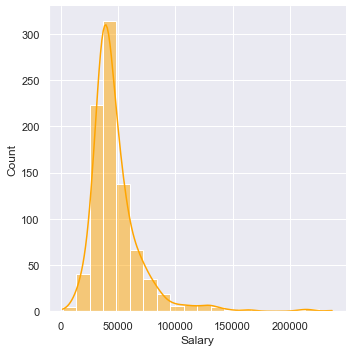

BoxPlot of Salary
------------------------------


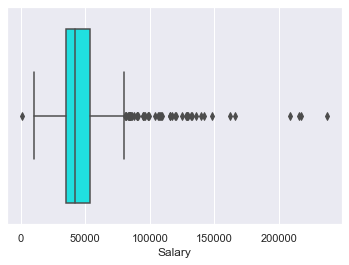

Description of age
--------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 

Distribution of age
-------------------------------------


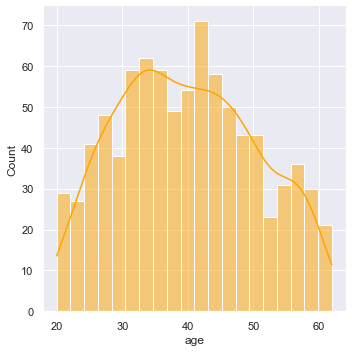

BoxPlot of age
------------------------------


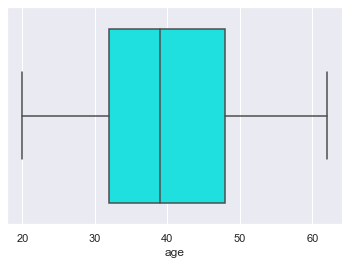

Description of educ
--------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 

Distribution of educ
-------------------------------------


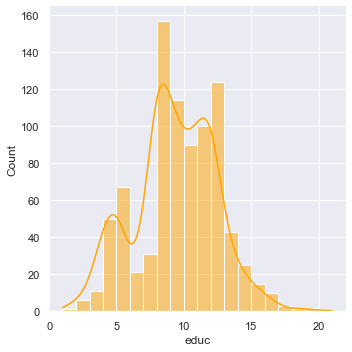

BoxPlot of educ
------------------------------


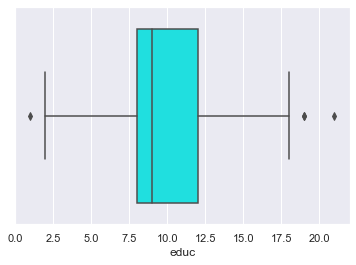

Description of no_young_children
--------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 

Distribution of no_young_children
-------------------------------------


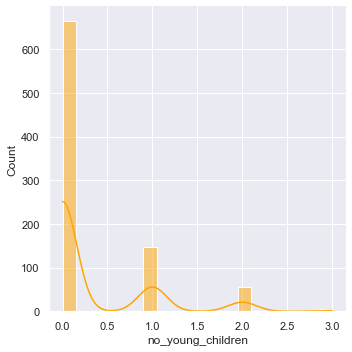

BoxPlot of no_young_children
------------------------------


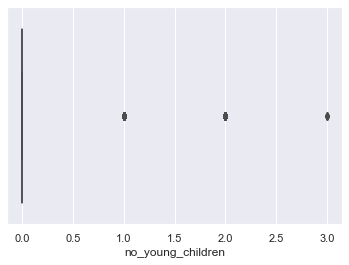

Description of no_older_children
--------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 

Distribution of no_older_children
-------------------------------------


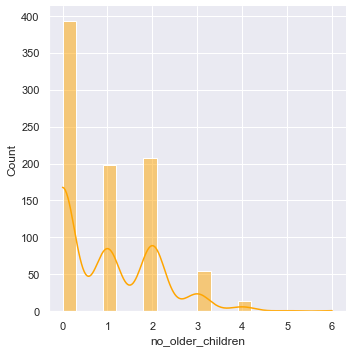

BoxPlot of no_older_children
------------------------------


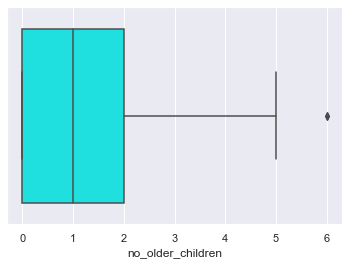

In [209]:
lstcolumns = list(df.select_dtypes(include=['int64','float64']).columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

In [210]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

HOLLIDAY_PACKAGE :  2 unique values
--------------------
no     471
yes    401
Name: Holliday_Package, dtype: int64

 HOLLIDAY_PACKAGE (normalized)
--------------------
no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

*************************************************


FOREIGN :  2 unique values
--------------------
no     656
yes    216
Name: foreign, dtype: int64

 FOREIGN (normalized)
--------------------
no     0.752294
yes    0.247706
Name: foreign, dtype: float64

*************************************************




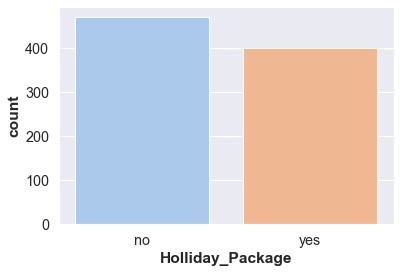

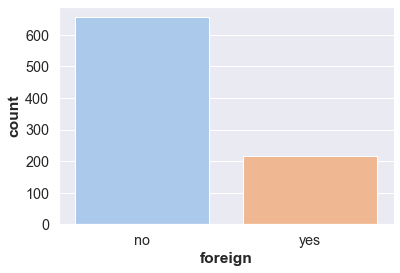

In [211]:
sns.set(font_scale=1.3)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

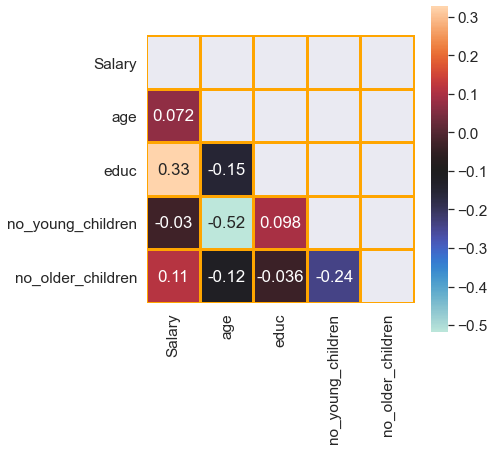

In [212]:
plt.figure(figsize=(6,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

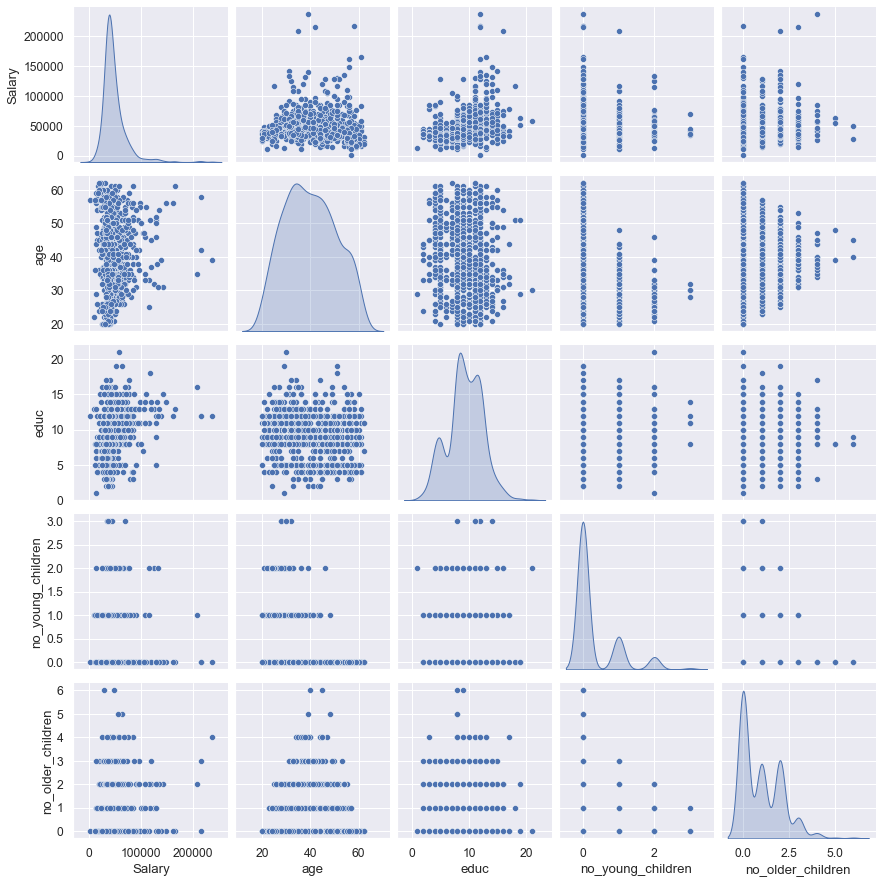

In [213]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde').savefig('out1.jpg')
sns.set(font_scale=1)

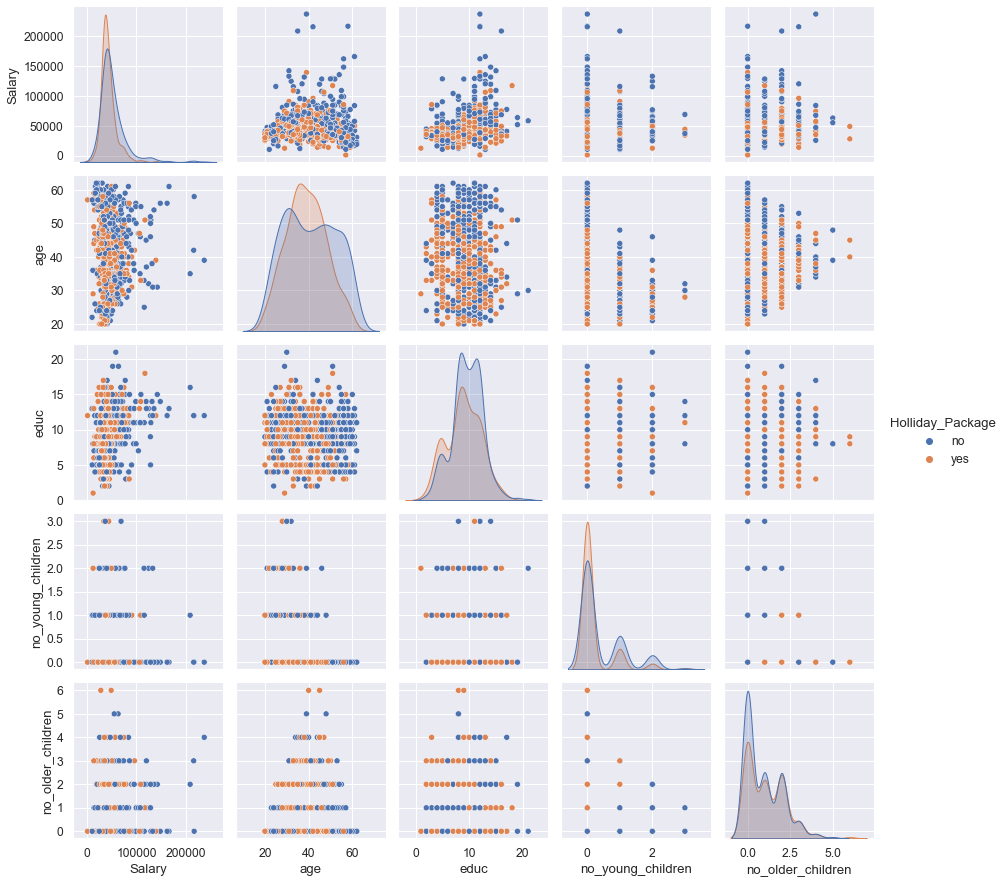

In [214]:
sns.set(font_scale=1.1)
sns.pairplot(df,hue='Holliday_Package',diag_kind='kde').savefig('out2.jpg')
sns.set(font_scale=1)

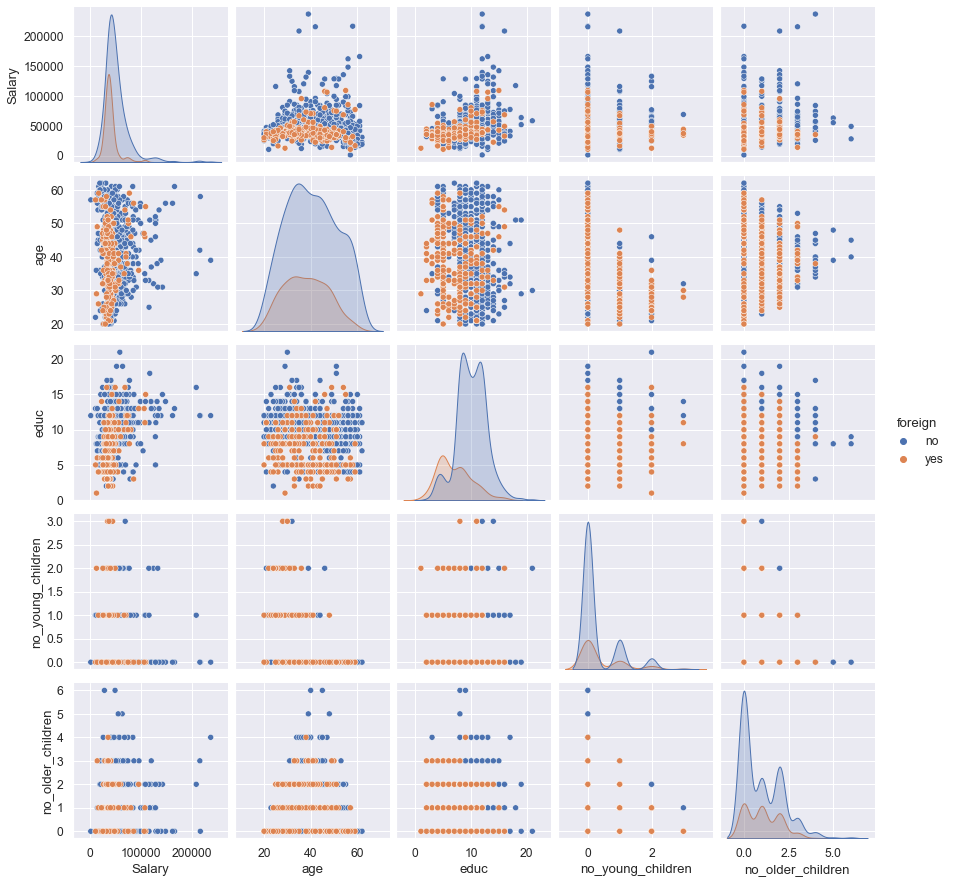

In [215]:
sns.set(font_scale=1.1)
sns.pairplot(df,hue='foreign',diag_kind='kde').savefig('out3.jpg')
sns.set(font_scale=1)

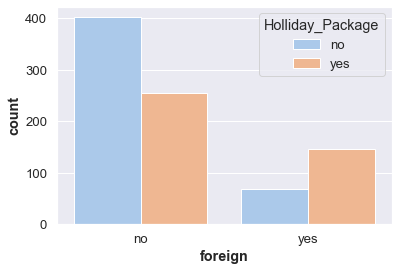

In [216]:
sns.set(font_scale=1.2)
for column in df.drop('Holliday_Package',axis=1).columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, hue='Holliday_Package', palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

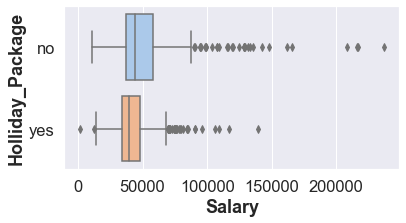

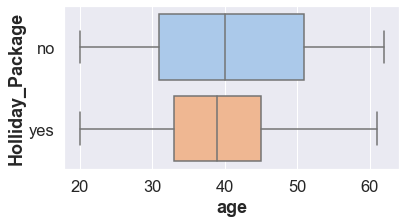

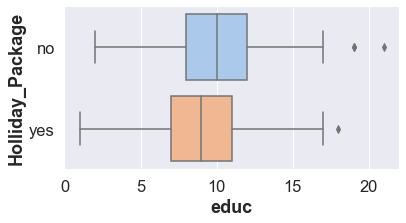

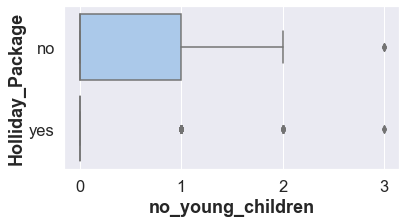

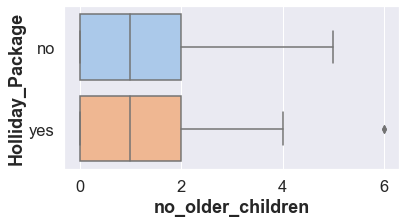

In [217]:
sns.set(font_scale=1.5)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for val in lstcolumns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=val, y='Holliday_Package', data=df, palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('Holliday_Package',weight="bold")
        plt.show()
sns.set(font_scale=1)

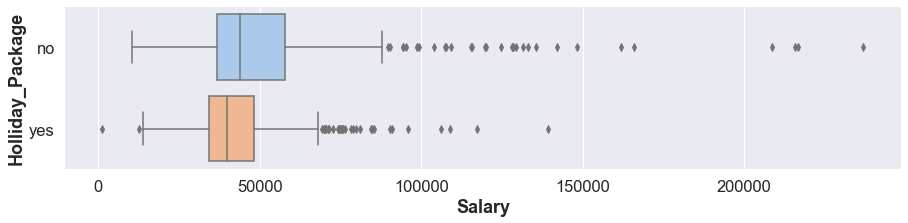

In [218]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,3))
sns.boxplot(x='Salary', y='Holliday_Package', data=df, palette='pastel',orient='h')
plt.xlabel('Salary',weight="bold")
plt.ylabel('Holliday_Package',weight="bold")
plt.show()
sns.set(font_scale=1)

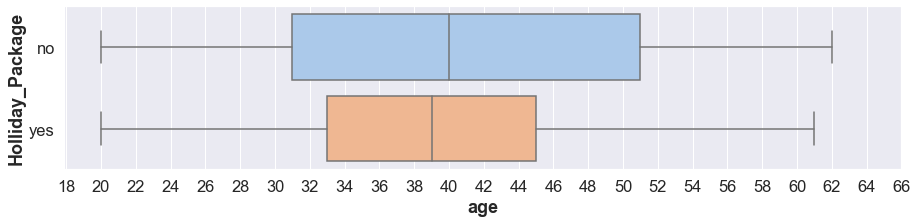

In [219]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,3))
sns.boxplot(x='age', y='Holliday_Package', data=df, palette='pastel',orient='h')
plt.xlabel('age',weight="bold")
plt.ylabel('Holliday_Package',weight="bold")
plt.xticks(range(18,67,2))
plt.show()
sns.set(font_scale=1)

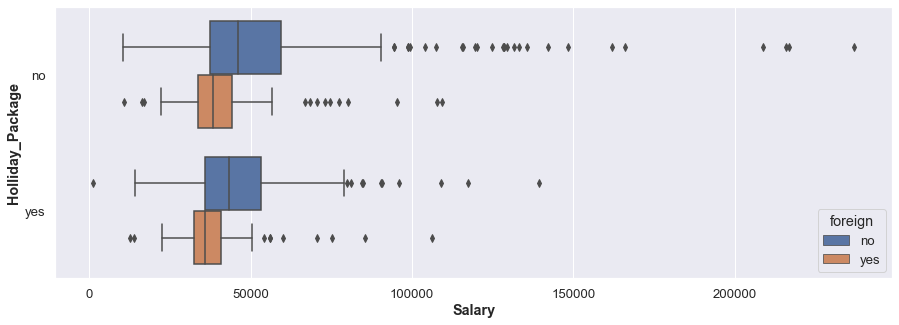

In [220]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15,5))
sns.boxplot(y='Holliday_Package', x='Salary', hue='foreign',data=df,orient='h',);
plt.xlabel('Salary',weight="bold")
plt.ylabel('Holliday_Package',weight="bold")
sns.set(font_scale=1)

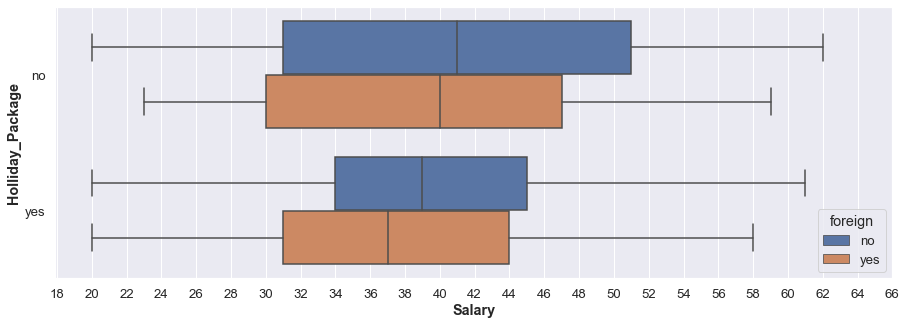

In [221]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15,5))
sns.boxplot(y='Holliday_Package', x='age', hue='foreign',data=df,orient='h',);
plt.xlabel('Salary',weight="bold")
plt.ylabel('Holliday_Package',weight="bold")
plt.xticks(range(18,67,2))
sns.set(font_scale=1)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [223]:
df['Holliday_Package']=np.where(df['Holliday_Package'] =='yes', '1', df['Holliday_Package'])
df['Holliday_Package']=np.where(df['Holliday_Package'] =='no', '0', df['Holliday_Package'])

In [224]:
df['foreign']=np.where(df['foreign'] =='yes', '1', df['foreign'])
df['foreign']=np.where(df['foreign'] =='no', '0', df['foreign'])

In [225]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

HOLLIDAY_PACKAGE :  2 unique values
--------------------
0    471
1    401
Name: Holliday_Package, dtype: int64

 HOLLIDAY_PACKAGE (normalized)
--------------------
0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

*************************************************


FOREIGN :  2 unique values
--------------------
0    656
1    216
Name: foreign, dtype: int64

 FOREIGN (normalized)
--------------------
0    0.752294
1    0.247706
Name: foreign, dtype: float64

*************************************************




In [226]:
df['foreign'] = df['foreign'].astype('int8')
df['Holliday_Package'] = df['Holliday_Package'].astype('int8')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [228]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [229]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['Holliday_Package'])

In [230]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [231]:
grid={'penalty':['none', 'l2'],         # 'elasticnet', 'l1'
      'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],          # 'liblinear'
      'tol':[0.0001,0.00001,0.001]}

In [232]:
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [233]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [234]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 0.001]},
             scoring='f1')

In [235]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg')


In [236]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg')


In [237]:
best_model = grid_search.best_estimator_

In [238]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [239]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697041,0.302959
3,0.496348,0.503652
4,0.557723,0.442277


In [240]:
best_model.score(X_train, y_train)

0.6672131147540984

In [241]:
best_model.score(X_test, y_test)

0.6526717557251909

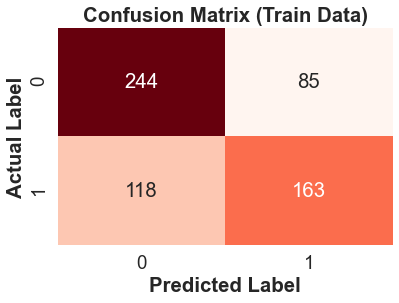

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



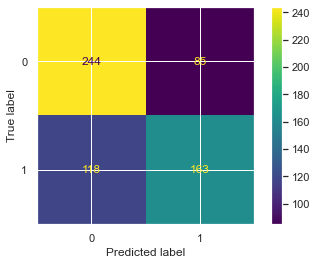

In [242]:
## Confusion matrix on the training data

sns.set(font_scale=1.7)
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.735


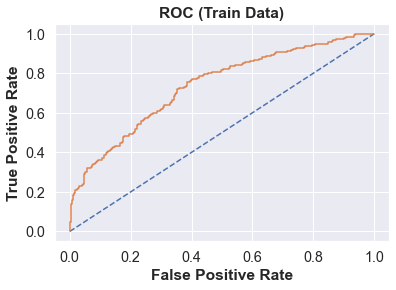

In [243]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

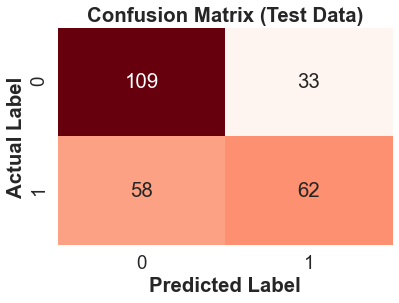

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



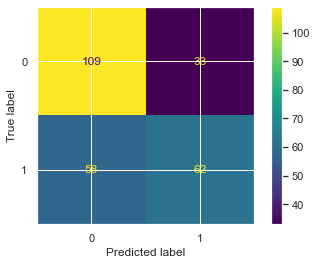

In [244]:
## Confusion matrix on the test data
sns.set(font_scale=1.7)
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.717


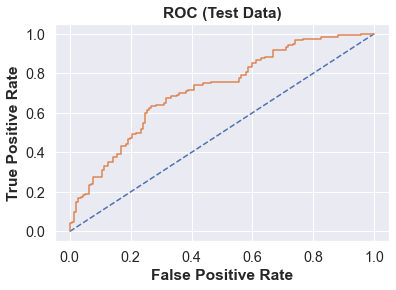

In [245]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [246]:
best_model.coef_

array([[-1.64614201e-05, -5.70725372e-02,  6.03473315e-02,
        -1.34883480e+00, -4.89436596e-02,  1.26647920e+00]])

In [247]:
best_model.intercept_

array([2.462441])

In [248]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))

The coefficient for Salary is -1.6461420085214953e-05
The coefficient for age is -0.057072537177018094
The coefficient for educ is 0.06034733146849842
The coefficient for no_young_children is -1.348834795784143
The coefficient for no_older_children is -0.0489436595505914
The coefficient for foreign is 1.2664792025982512


In [249]:
pred_train_prob = best_model.predict_proba(X_train)
pred_test_prob = best_model.predict_proba(X_test)

In [250]:
pred_train_prob = pred_train_prob[:,1]

In [251]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [252]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [253]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [254]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

,Threshold,Accuracy,f1,Recall,Precision
0,0.1,0.485246,0.640732,0.996441,0.472175
1,0.2,0.518033,0.646635,0.957295,0.488203
2,0.3,0.591803,0.668442,0.893238,0.534043
3,0.4,0.675410,0.684713,0.765125,0.619597
4,0.5,0.667213,0.616257,0.580071,0.657258
5,0.6,0.659016,0.535714,0.427046,0.718563
6,0.7,0.649180,0.433862,0.291815,0.845361
7,0.8,0.588525,0.198083,0.110320,0.968750
8,0.9,0.542623,0.014134,0.007117,1.000000


In [255]:
dat[dat['f1']==dat['f1'].max()]

,Threshold,Accuracy,f1,Recall,Precision
3,0.4,0.67541,0.684713,0.765125,0.619597


In [256]:
custom_prob = 0.4
custom_cutoff_data=[]

for i in range(0,len(pred_train_prob)):  #2333
    if pred_train_prob[i] >custom_prob:
        a= 1
    else:
        a=0
    custom_cutoff_data.append(a)

In [257]:
ytrain_predict = custom_cutoff_data

In [258]:
data_pred_custom_cutoff=[]
for i in range(0,len(ytest_predict_prob[:,1])):
    if np.array(ytest_predict_prob[:,1])[i]>custom_prob:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [259]:
ytest_predict = data_pred_custom_cutoff

In [260]:
accuracy_score(y_train,ytrain_predict)

0.6754098360655738

In [261]:
accuracy_score(y_test,ytest_predict)

0.6450381679389313

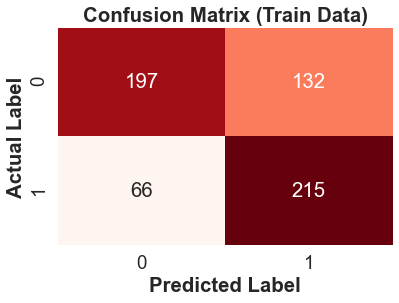

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.60      0.67       329
           1       0.62      0.77      0.68       281

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.69      0.68      0.67       610
 



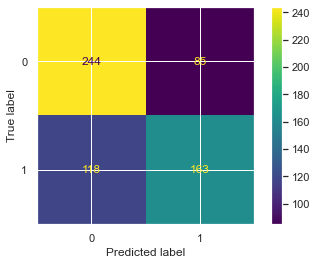

In [262]:
## Confusion matrix on the training data

sns.set(font_scale=1.7)
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.735


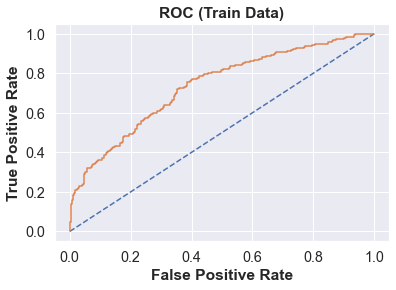

In [263]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

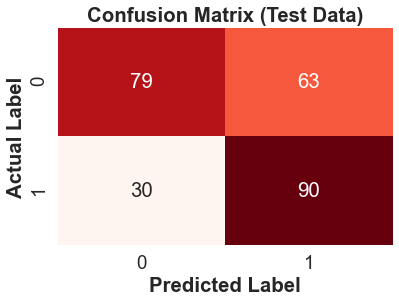

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.72      0.56      0.63       142
           1       0.59      0.75      0.66       120

    accuracy                           0.65       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



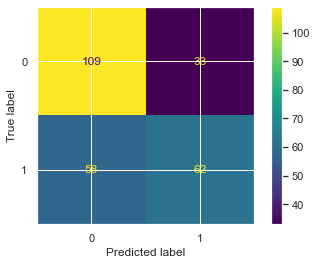

In [264]:
## Confusion matrix on the test data
sns.set(font_scale=1.7)
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.717


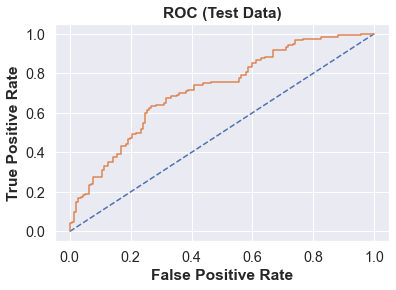

In [265]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [266]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(610, 57)

In [267]:
grid={'penalty':['none'],         # 'l2'
      'solver':['newton-cg'],          # 'liblinear', 'lbfgs', 'sag', 'saga'
      'tol':[0.0001]}          #   0.00001,0.001

In [268]:
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [269]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [270]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['none'], 'solver': ['newton-cg'],
                         'tol': [0.0001]},
             scoring='f1')

In [271]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg')


In [272]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg')


In [273]:
best_model = grid_search.best_estimator_

In [274]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [275]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.779207,0.220793
1,0.256994,0.743006
2,0.988568,0.011432
3,0.979233,0.020767
4,0.561758,0.438242


In [276]:
best_model.score(X_train, y_train)

0.6967213114754098

In [277]:
best_model.score(X_test, y_test)

0.683206106870229

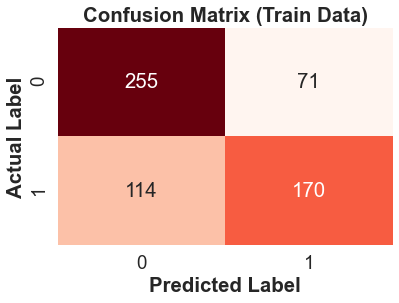

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.69      0.78      0.73       326
           1       0.71      0.60      0.65       284

    accuracy                           0.70       610
   macro avg       0.70      0.69      0.69       610
weighted avg       0.70      0.70      0.69       610
 



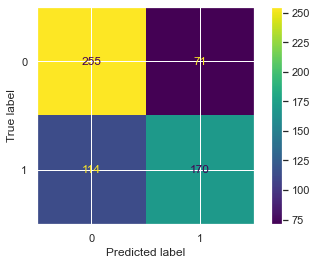

In [278]:
## Confusion matrix on the training data

sns.set(font_scale=1.7)
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.782


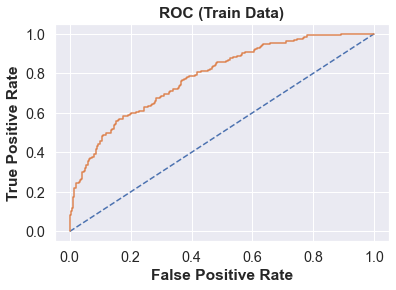

In [279]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

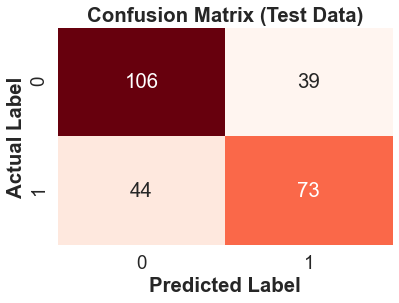

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.71      0.73      0.72       145
           1       0.65      0.62      0.64       117

    accuracy                           0.68       262
   macro avg       0.68      0.68      0.68       262
weighted avg       0.68      0.68      0.68       262
 



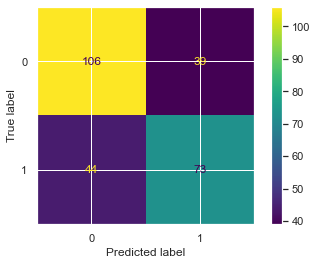

In [280]:
## Confusion matrix on the test data
sns.set(font_scale=1.7)
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.691


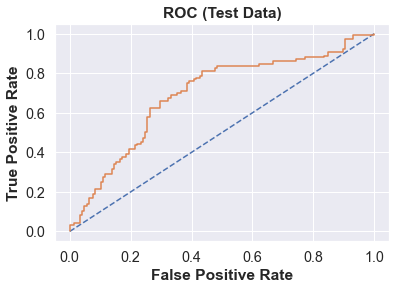

In [281]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [282]:
best_model.coef_

array([[ 3.41802197e-03,  9.93110568e-05, -1.32213958e-02,
         2.73206430e-02, -1.36689440e-02,  1.05449281e-02,
         1.14258253e-03, -2.40248982e-06, -9.41060101e-07,
         3.64118296e-05, -6.10661485e-05,  2.10790258e-04,
         1.94783791e-03, -2.34673787e-01,  2.59489606e-02,
        -3.97181254e-02, -7.64523388e-02,  8.69626111e-02,
        -2.06933694e-02, -1.82536996e-03,  8.71792801e-04,
         1.11430828e-02,  1.19247999e-08,  6.14983186e-07,
         8.61425717e-07, -1.87490289e-06, -1.39196463e-05,
        -5.60007034e-07, -2.64838905e-05,  9.03401126e-05,
         8.14905655e-05, -1.63385969e-06,  2.06330332e-02,
        -4.68736306e-03,  9.61561310e-03,  1.75042692e-02,
         2.23471279e-02,  9.44881512e-02, -2.12501034e-02,
        -8.87837835e-03,  4.66643700e-02,  3.11648943e-03,
         2.09024502e-07,  6.31120749e-08,  2.60406264e-07,
        -2.72198082e-06, -3.56902611e-06, -2.80503569e-06,
         1.51318716e-06,  4.88013071e-06,  1.24996998e-0

In [283]:
pred_train_prob = best_model.predict_proba(X_train)
pred_test_prob = best_model.predict_proba(X_test)

In [284]:
pred_train_prob = pred_train_prob[:,1]

In [285]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [286]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [287]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [288]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

,Threshold,Accuracy,f1,Recall,Precision
0,0.1,0.531148,0.663529,0.992958,0.498233
1,0.2,0.578689,0.683107,0.975352,0.525617
2,0.3,0.637705,0.700136,0.908451,0.569536
3,0.4,0.685246,0.703704,0.802817,0.626374
4,0.5,0.696721,0.647619,0.598592,0.705394
5,0.6,0.690164,0.571429,0.443662,0.802548
6,0.7,0.668852,0.507317,0.366197,0.825397
7,0.8,0.637705,0.404313,0.264085,0.862069
8,0.9,0.581967,0.190476,0.105634,0.967742


In [289]:
dat[dat['f1']==dat['f1'].max()]

,Threshold,Accuracy,f1,Recall,Precision
3,0.4,0.685246,0.703704,0.802817,0.626374


In [290]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

,Threshold,Accuracy,f1,Recall,Precision
4,0.5,0.696721,0.647619,0.598592,0.705394


In [291]:
custom_prob = 0.4
custom_cutoff_data=[]

for i in range(0,len(pred_train_prob)):  #2333
    if pred_train_prob[i] >custom_prob:
        a= 1
    else:
        a=0
    custom_cutoff_data.append(a)

In [292]:
ytrain_predict = custom_cutoff_data

In [293]:
data_pred_custom_cutoff=[]
for i in range(0,len(ytest_predict_prob[:,1])):
    if np.array(ytest_predict_prob[:,1])[i]>custom_prob:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [294]:
ytest_predict = data_pred_custom_cutoff

In [295]:
accuracy_score(y_train,ytrain_predict)

0.6852459016393443

In [296]:
accuracy_score(y_test,ytest_predict)

0.6679389312977099

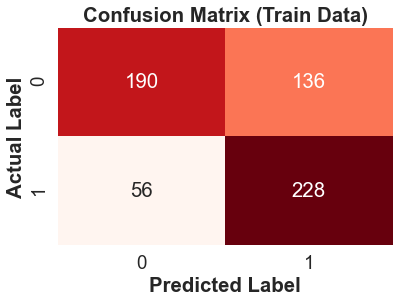

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.58      0.66       326
           1       0.63      0.80      0.70       284

    accuracy                           0.69       610
   macro avg       0.70      0.69      0.68       610
weighted avg       0.70      0.69      0.68       610
 



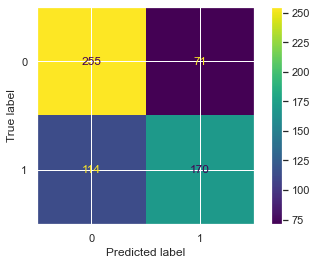

In [297]:
## Confusion matrix on the training data

sns.set(font_scale=1.7)
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.782


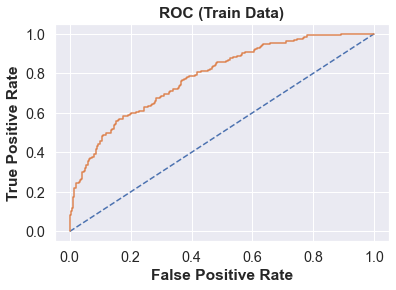

In [298]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

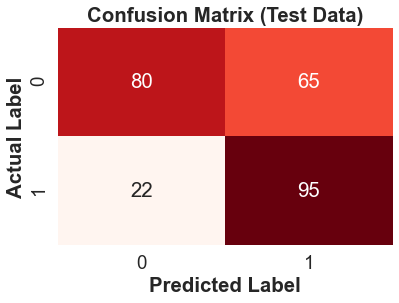

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.55      0.65       145
           1       0.59      0.81      0.69       117

    accuracy                           0.67       262
   macro avg       0.69      0.68      0.67       262
weighted avg       0.70      0.67      0.66       262
 



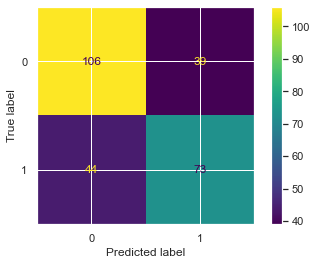

In [299]:
## Confusion matrix on the test data
sns.set(font_scale=1.7)
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.691


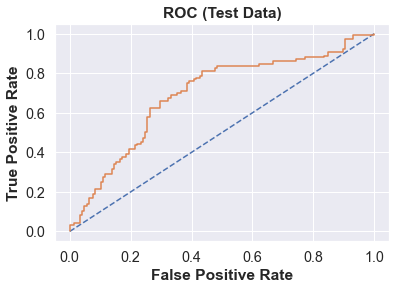

In [300]:
sns.set(font_scale=1.3)
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [301]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [302]:
df=pd.read_csv('Holiday_Package.csv') 

In [303]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [305]:
df['Holliday_Package']=np.where(df['Holliday_Package'] =='yes', '1', df['Holliday_Package'])
df['Holliday_Package']=np.where(df['Holliday_Package'] =='no', '0', df['Holliday_Package'])

In [306]:
df['foreign']=np.where(df['foreign'] =='yes', '1', df['foreign'])
df['foreign']=np.where(df['foreign'] =='no', '0', df['foreign'])

In [307]:
df['foreign'] = df['foreign'].astype('int8')
df['Holliday_Package'] = df['Holliday_Package'].astype('int8')

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [309]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [310]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['Holliday_Package'])

In [311]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [312]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [313]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [314]:
accuracy_score(Y_train,pred_class_train)

0.6639344262295082

In [315]:
accuracy_score(Y_test,pred_class_test)

0.6412213740458015

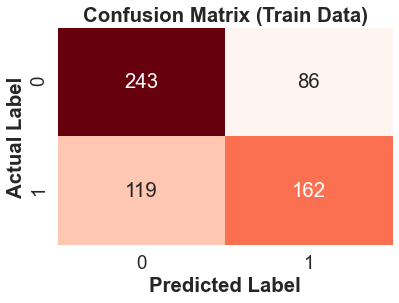

In [316]:
## Confusion matrix on the training data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
sns.set(font_scale=1.7)
confusion_matrix(Y_train,pred_class_train)
sns.heatmap(confusion_matrix(Y_train,pred_class_train),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

AUC: 0.733


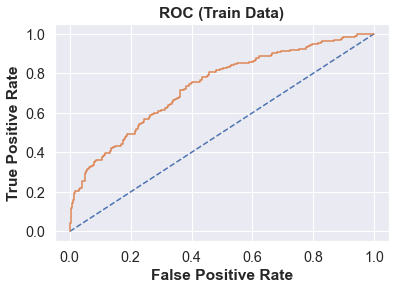

In [317]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

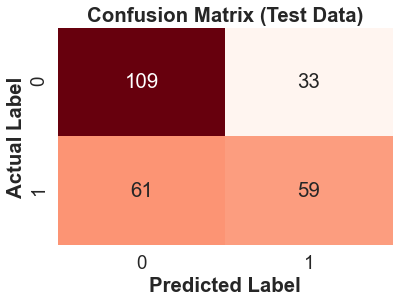

In [318]:
sns.set(font_scale=1.7)
confusion_matrix(Y_test,pred_class_test)
sns.heatmap(confusion_matrix(Y_test,pred_class_test),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

AUC: 0.714


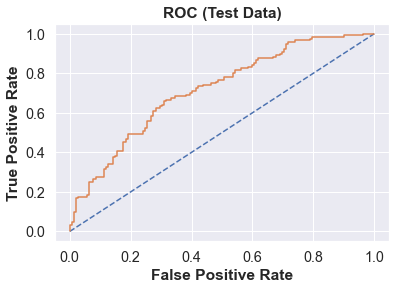

In [319]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [320]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)

In [321]:
pred_train_prob = pred_train_prob[:,1]

In [322]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [323]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [324]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(Y_train,result))
    f1.append(f1_score(Y_train,result))
    rec.append(recall_score(Y_train,result))
    pre.append(precision_score(Y_train,result))


In [325]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

,Threshold,Accuracy,f1,Recall,Precision
0,0.1,0.481967,0.639269,0.996441,0.470588
1,0.2,0.521311,0.649880,0.964413,0.490054
2,0.3,0.593443,0.669333,0.893238,0.535181
3,0.4,0.665574,0.676190,0.758007,0.610315
4,0.5,0.663934,0.612476,0.576512,0.653226
5,0.6,0.659016,0.533632,0.423488,0.721212
6,0.7,0.649180,0.439791,0.298932,0.831683
7,0.8,0.588525,0.198083,0.110320,0.968750
8,0.9,0.542623,0.014134,0.007117,1.000000


In [326]:
dat[dat['f1']==dat['f1'].max()]

,Threshold,Accuracy,f1,Recall,Precision
3,0.4,0.665574,0.67619,0.758007,0.610315


In [327]:
custom_prob = 0.4
custom_cutoff_data=[]

for i in range(0,len(pred_train_prob)):  #2333
    if pred_train_prob[i] >custom_prob:
        a= 1
    else:
        a=0
    custom_cutoff_data.append(a)

In [328]:
ytrain_predict = custom_cutoff_data

In [329]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_test_prob)):
    if np.array(pred_train_prob)[i]>custom_prob:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [330]:
ytest_predict = data_pred_custom_cutoff

In [331]:
accuracy_score(Y_train,ytrain_predict)

0.6655737704918033

In [332]:
accuracy_score(Y_test,ytest_predict)

0.48854961832061067

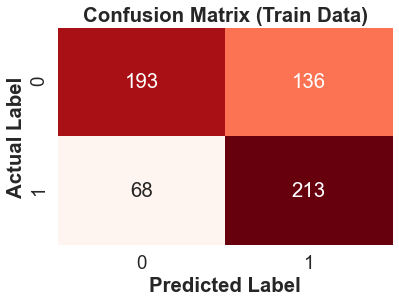

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.74      0.59      0.65       329
           1       0.61      0.76      0.68       281

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.68      0.67      0.66       610
 



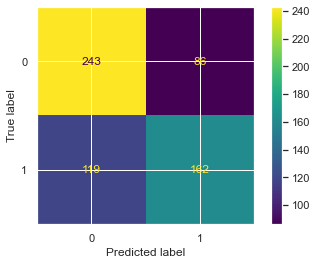

In [333]:
## Confusion matrix on the training data

sns.set(font_scale=1.7)
confusion_matrix(Y_train,ytrain_predict)
sns.heatmap(confusion_matrix(Y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(model,X_train,Y_train)
print(classification_report(Y_train, ytrain_predict),'\n');

AUC: 0.733


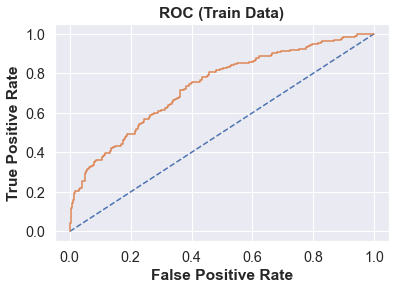

In [334]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

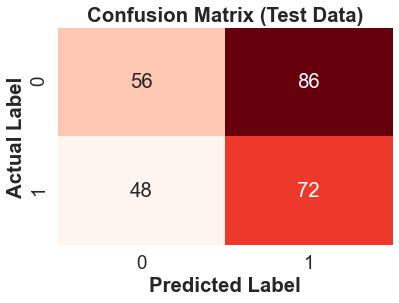

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.54      0.39      0.46       142
           1       0.46      0.60      0.52       120

    accuracy                           0.49       262
   macro avg       0.50      0.50      0.49       262
weighted avg       0.50      0.49      0.48       262
 



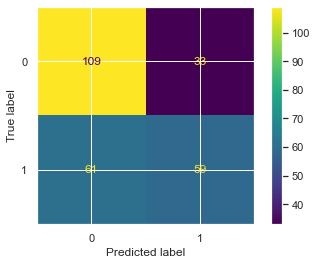

In [335]:
## Confusion matrix on the test data
sns.set(font_scale=1.7)
confusion_matrix(Y_test,ytest_predict)
sns.heatmap(confusion_matrix(Y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(model,X_test,Y_test)
print(classification_report(Y_test, ytest_predict),'\n');

AUC: 0.714


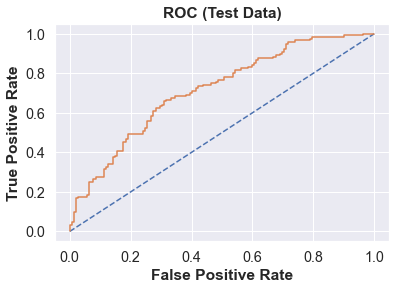

In [336]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [337]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(610, 57)

In [338]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [339]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [340]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.59      0.79      0.68       326
           1       0.61      0.38      0.47       284

    accuracy                           0.60       610
   macro avg       0.60      0.58      0.57       610
weighted avg       0.60      0.60      0.58       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.77      0.69       145
           1       0.60      0.43      0.50       117

    accuracy                           0.62       262
   macro avg       0.61      0.60      0.60       262
weighted avg       0.62      0.62      0.61       262
 



In [341]:
accuracy_score(Y_train,pred_class_train)

0.6311475409836066

In [342]:
accuracy_score(Y_test,pred_class_test)

0.4618320610687023

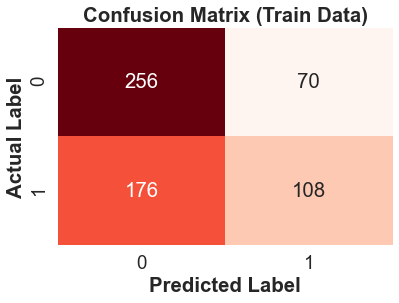

In [343]:
## Confusion matrix on the training data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
sns.set(font_scale=1.7)
confusion_matrix(y_train,pred_class_train)
sns.heatmap(confusion_matrix(y_train,pred_class_train),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

AUC: 0.601


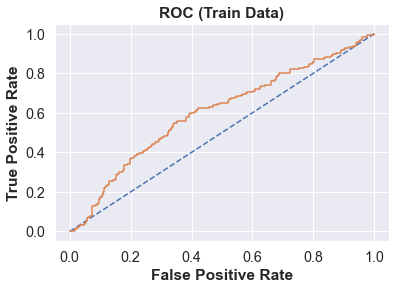

In [344]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

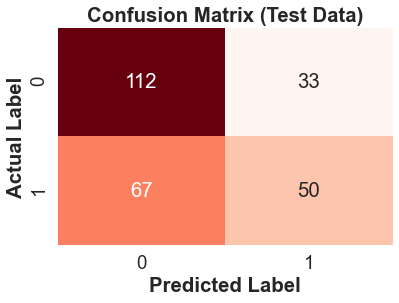

In [345]:
sns.set(font_scale=1.7)
confusion_matrix(y_test,pred_class_test)
sns.heatmap(confusion_matrix(y_test,pred_class_test),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

AUC: 0.639


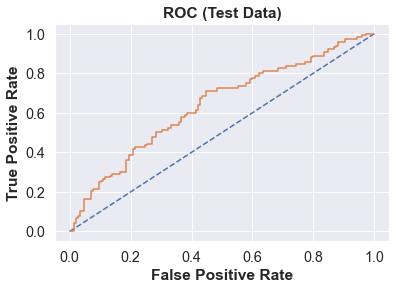

In [346]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [347]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)

In [348]:
pred_train_prob = pred_train_prob[:,1]

In [349]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [350]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [351]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [352]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

,Threshold,Accuracy,f1,Recall,Precision
0,0.1,0.467213,0.634421,0.992958,0.466116
1,0.2,0.473770,0.628042,0.954225,0.468048
2,0.3,0.483607,0.619105,0.901408,0.471455
3,0.4,0.536066,0.596291,0.735915,0.501199
4,0.5,0.596721,0.467532,0.380282,0.606742
5,0.6,0.563934,0.288770,0.190141,0.600000
6,0.7,0.540984,0.166667,0.098592,0.538462
7,0.8,0.529508,0.059016,0.031690,0.428571
8,0.9,0.527869,0.006897,0.003521,0.166667


In [353]:
dat[dat['f1']==dat['f1'].max()]

,Threshold,Accuracy,f1,Recall,Precision
0,0.1,0.467213,0.634421,0.992958,0.466116


In [354]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

,Threshold,Accuracy,f1,Recall,Precision
4,0.5,0.596721,0.467532,0.380282,0.606742


In [355]:
custom_prob = 0.4
custom_cutoff_data=[]

for i in range(0,len(pred_train_prob)):  #2333
    if pred_train_prob[i] >custom_prob:
        a= 1
    else:
        a=0
    custom_cutoff_data.append(a)

In [356]:
ytrain_predict = custom_cutoff_data

In [357]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_test_prob)):
    if np.array(pred_train_prob)[i]>custom_prob:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [358]:
ytest_predict = data_pred_custom_cutoff

In [359]:
accuracy_score(y_train,ytrain_predict)

0.5360655737704918

In [360]:
accuracy_score(y_test,ytest_predict)

0.4618320610687023

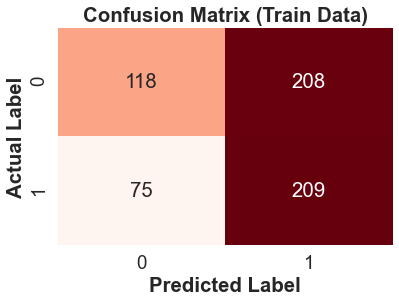

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.61      0.36      0.45       326
           1       0.50      0.74      0.60       284

    accuracy                           0.54       610
   macro avg       0.56      0.55      0.53       610
weighted avg       0.56      0.54      0.52       610
 



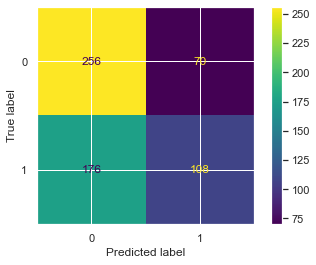

In [361]:
## Confusion matrix on the training data

sns.set(font_scale=1.7)
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.601


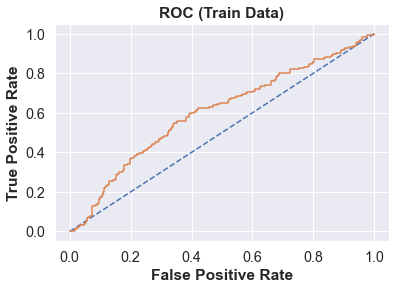

In [362]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

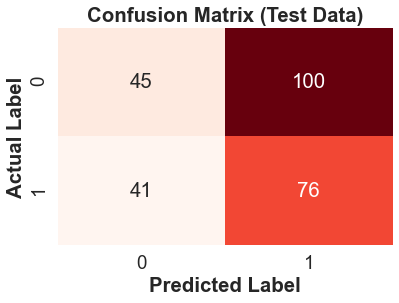

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.52      0.31      0.39       145
           1       0.43      0.65      0.52       117

    accuracy                           0.46       262
   macro avg       0.48      0.48      0.45       262
weighted avg       0.48      0.46      0.45       262
 



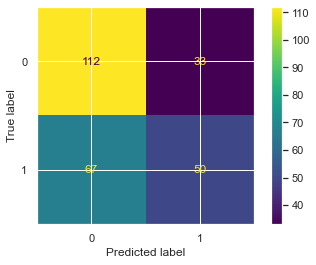

In [363]:
## Confusion matrix on the test data
sns.set(font_scale=1.7)
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.639


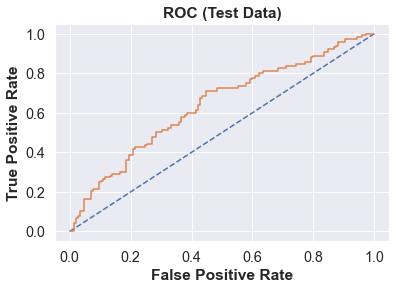

In [364]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)